In [1]:
from os import walk
from os.path import join
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup 

In [4]:
sys.getfilesystemencoding()

'utf-8'

In [5]:
EXAMPLE_FILE ='SpamData/SpamData/01_Processing/practice_email.txt'

In [6]:
stream=open(EXAMPLE_FILE, encoding = 'latin-1')

In [7]:
message = stream.read()

In [8]:
stream.close()

In [9]:
print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [10]:
stream=open(EXAMPLE_FILE, encoding = 'latin-1')

is_body = False

lines = []

for line in stream:
    
    if is_body:
        
        lines.append(line)
        
    elif line == '\n':
        
        is_body = True

stream.close()

In [11]:
lines

['\n',
 'Dear Mr Still\n',
 '\n',
 'Good tidings to you and all your staff for the festive season ahead (Christmas).\n',
 'Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa\'s Grotto" in your store.\n',
 'But WAIT! You\'re probably thinking: "What makes him so special?"\n',
 'Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.\n',
 'You will note also, from the enclosed sketch, that I have radically redesigned Santa\'s outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.\n',
 'I look forward to hearing from you.\n',
 '\n',
 'Best wishes\n'

In [12]:
email_body = ''.join(lines)

In [13]:
print(email_body)


Dear Mr Still

Good tidings to you and all your staff for the festive season ahead (Christmas).
Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.
But WAIT! You're probably thinking: "What makes him so special?"
Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.
You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.
I look forward to hearing from you.

Best wishes
Robin Cooper
[Excerpt from the book: The Timewaster Letters by Robi

In [14]:
SPAM_1_PATH = 'SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_CAT = 1

In [15]:
## we are extracting multiple filenames here from the walk(to go through the filenames)
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            print(filepath)

In [16]:
email_body_generator(SPAM_1_PATH)

SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1\00001.7848dde101aa985090474a91ec93fcf0
SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1\00002.d94f1b97e48ed3b553b3508d116e6a09
SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1\00003.2ee33bc6eacdb11f38d052c44819ba6c
SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1\00004.eac8de8d759b7e74154f142194282724
SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1\00005.57696a39d7d84318ce497886896bf90d
SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1\00006.5ab5620d3d7c6c0db76234556a16f6c1
SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1\00007.d8521faf753ff9ee989122f6816f87d7
SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1\00008.dfd941deb10f5eed78b1594b131c9266
SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1\00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1\00010.445affef4c70feec58f9198cfbc22997
SpamData/S

In [17]:
## we are extracted email body section from multiple files as given above
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')

            is_body = False
            
            lines = []

            for line in stream:
                
                if is_body:
                    
                    lines.append(line)
                    
                elif line == '\n':
                    
                    is_body = True

            stream.close()
            
            email_body = '\n'.join(lines)
            
            yield file_name, email_body 

In [18]:
## we are converting the email body section , root and its classification(whether it is spam or ham) into a dataframe
def df_from_directory(path, classification):
    
    
    rows = []
    
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [19]:
df_from_directory(SPAM_1_PATH, SPAM_CAT)

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
00497.ebf699da617b11135f3aa9173b9781b9,<html>\n\n<head>\n\n<title>Untitled Document</...,1
00498.48c3098854d339353f1a28a13b196017,This is an HTML email message. If you see thi...,1
00499.988506a852cf86b396771a8bdc8cf839,<html>\n\n<head>\n\n</head>\n\n <body backgro...,1
00500.85b72f09f6778a085dc8b6821965a76f,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon...",1


In [20]:
SPAM_2_PATH = 'SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_2'

In [21]:
df_from_directory(SPAM_2_PATH,SPAM_CAT)

,MESSAGE,CATEGORY
00001.317e78fa8ee2f54cd4890fdc09ba8176,Greetings!\n\n\n\nYou are receiving this lette...,1
00002.9438920e9a55591b18e60d1ed37d992b,<html>\n\n<body>\n\n<center>\n\n<h3>\n\n<font ...,1
00003.590eff932f8704d8b0fcbe69d023b54d,<html>\n\n<body>\n\n<center>\n\n<b>\n\n<font c...,1
00004.bdcc075fa4beb5157b5dd6cd41d8887b,<html>\n\n<body>\n\n<center>\n\n<b>\n\n<font c...,1
00005.ed0aba4d386c5e62bc737cf3f0ed9589,"<html><xbody>\n\n<hr width = ""100%"">\n\n<cente...",1
...,...,...
01397.f75f0dd0dd923faefa3e9cc5ecb8c906,This is a multi-part message in MIME format.\n...,1
01398.8ca7045aae4184d56e8509dc5ad6d979,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1
01399.2319643317e2c5193d574e40a71809c2,****Mid-Summer Customer Appreciation SALE!****...,1
01400.b444b69845db2fa0a4693ca04e6ac5c5,ATTN:SIR/MADAN \n\n\n\n ...,1


In [22]:
spam_emails = df_from_directory(SPAM_1_PATH, SPAM_CAT)

In [23]:
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))

In [24]:
spam_emails

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01397.f75f0dd0dd923faefa3e9cc5ecb8c906,This is a multi-part message in MIME format.\n...,1
01398.8ca7045aae4184d56e8509dc5ad6d979,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1
01399.2319643317e2c5193d574e40a71809c2,****Mid-Summer Customer Appreciation SALE!****...,1
01400.b444b69845db2fa0a4693ca04e6ac5c5,ATTN:SIR/MADAN \n\n\n\n ...,1


In [25]:
EASY_NONSPAM_1_PATH = 'SpamData/SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
HAM_CAT = 0

In [26]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)

In [27]:
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))

In [28]:
ham_emails

,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [29]:
data=pd.concat([spam_emails, ham_emails])
data

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [30]:
data['MESSAGE'].isnull().sum()

0

In [31]:
(data.MESSAGE.str.len()==0).any()

True

In [32]:
(data.MESSAGE.str.len()==0).sum()

3

In [33]:
data[data.MESSAGE.str.len()==0]

,MESSAGE,CATEGORY
cmds,,1
cmds,,1
cmds,,0


In [34]:
data[data.MESSAGE.str.len()==0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [35]:
data.drop(['cmds'], inplace = True)

In [36]:
data

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [37]:
document_ids = range(0, len(data.index))
document_ids

range(0, 5796)

In [38]:
data['DOC_ID'] = document_ids
data

,MESSAGE,CATEGORY,DOC_ID
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4
...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5792
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5794


In [39]:
data['FILE_NAME'] = data.index
data

,MESSAGE,CATEGORY,DOC_ID,FILE_NAME
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0,00001.7848dde101aa985090474a91ec93fcf0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1,00002.d94f1b97e48ed3b553b3508d116e6a09
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2,00003.2ee33bc6eacdb11f38d052c44819ba6c
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3,00004.eac8de8d759b7e74154f142194282724
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5791,01396.61983fbe6ec43f55fd44e30fce24ffa6
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5792,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5793,01398.169b51731fe569f42169ae8f948ec676
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5794,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896


In [40]:
data.set_index('DOC_ID', inplace = True)
data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [41]:
#JSON is short for JavaScript Object Notation, 
#and is a way to store information in an organized, easy-to-access manner.
#It gives us a human-readable collection of 
#data that we can access in a really logical manner.

In [42]:
DATA_JSON_FILE='SpamData/SpamData/01_Processing/email-text-data.json'
data.to_json(DATA_JSON_FILE)

In [43]:
# Data Visualisation
# pie charts and donut charts

In [44]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [45]:
amount_of_ham=data.CATEGORY.value_counts()[0]
amount_of_ham

3900

In [46]:
amount_of_spam=data.CATEGORY.value_counts()[1]
amount_of_spam

1896

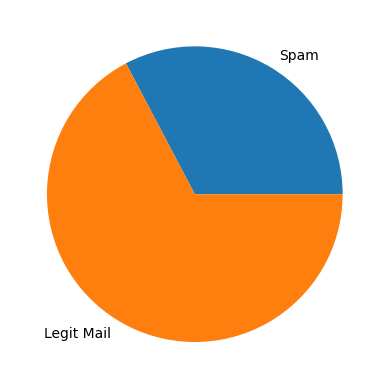

In [47]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
plt.pie(sizes, labels = category_names )
plt.show()

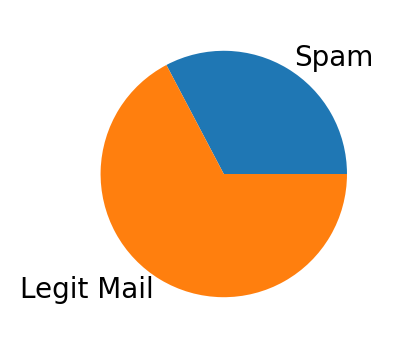

In [48]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
plt.figure(figsize =(2,2), dpi = 200)
plt.pie(sizes, labels = category_names )
plt.show()

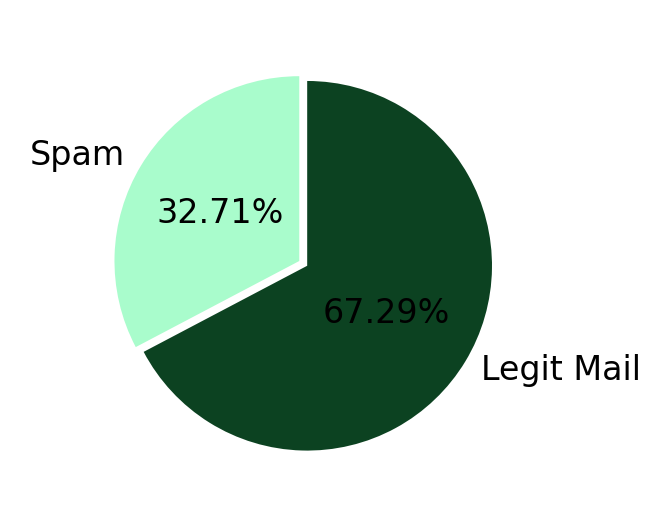

In [49]:
category_names = ['Spam', 'Legit Mail']
custom_colours = ['#a9fccc', '#0c4221']
sizes = [amount_of_spam, amount_of_ham]
plt.figure(figsize =(2,2), dpi = 300)
plt.pie(sizes, labels = category_names, textprops={'fontsize' : 8},startangle=90, colors=custom_colours, 
        autopct ='%.2f%%' , pctdistance=0.5,  explode=[0, 0.05])
plt.show()

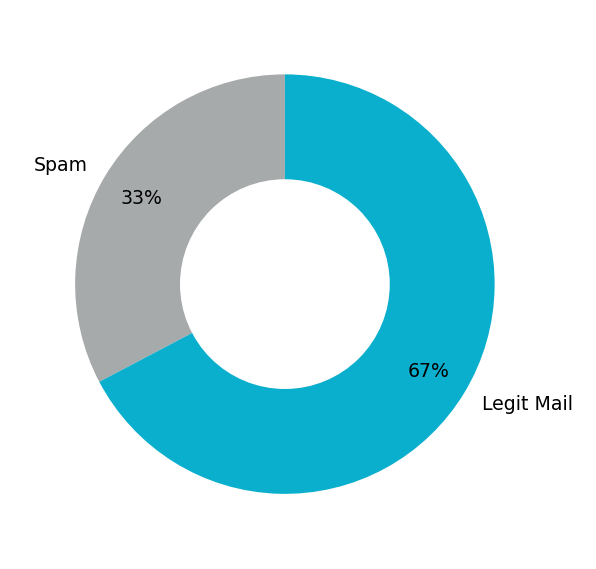

In [50]:
category_names = ['Spam', 'Legit Mail']

sizes = [amount_of_spam, amount_of_ham]

custom_colours = ['#a7aaab', '#0aafcd']

plt.figure(figsize=(3, 3), dpi=227)

plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8, )

centre_circle = plt.Circle((0,0), radius= 0.5, fc = 'white')

# centre_circle = plt.Circle((0,0), radius = 0.5, fc = 'white')


plt.gca().add_artist(centre_circle)


plt.show()

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vguru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vguru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
msg='The quick BROWN fox, is JUMPING over a  LAZY dog!!!!'

In [54]:
msg.lower()

'the quick brown fox, is jumping over a  lazy dog!!!!'

In [55]:
test_1=word_tokenize(msg.lower()) # converts the msg into tokens or individual words from a whole string
test_1

['the',
 'quick',
 'brown',
 'fox',
 ',',
 'is',
 'jumping',
 'over',
 'a',
 'lazy',
 'dog',
 '!',
 '!',
 '!',
 '!']

In [56]:
stop_words=stopwords.words('english')

In [57]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
len(stop_words)

179

In [59]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [60]:
stop_words=set(stop_words)

In [61]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be. THIS THIS THIS this'

In [62]:
# we are filtering the msg with stop words
words=word_tokenize(msg.lower())

filtered_words = []

for word in words:
    
    if word not in stop_words:
        
        filtered_words.append(word)
        
print(filtered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.']


In [63]:
stemmer=SnowballStemmer('english') # snowball stemmer can take any lang as an argument unless we provide specific lang but for a default eng lang we can go for porterstemmer

In [64]:
stemmer.stem('fishing') # In stemmer we usually remove ending letters in a word like this but not acc to the dictionary where as in Lemmatization it does acc to dict

'fish'

In [65]:
stemmer.stem('quantities')

'quantiti'

In [66]:
msg = 'steams, steaming and no play makes Jack a dull boy. To be or not to be.? ;;@@ Nobody. Fishing and fisher, steamer'

In [67]:
words=word_tokenize(msg.lower())

filtered_words = []

for word in words:
    
    if word not in stop_words and word.isalpha(): # word.isalpha() is boolean val whether it is alphabet or not to filter spcial characters here
        
        stemmed_word = stemmer.stem(word)
        
        filtered_words.append(stemmed_word)
        
print(filtered_words)

['steam', 'steam', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'fish', 'fisher', 'steamer']


In [68]:
html_doc = '''

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>

'''

In [69]:
soup=BeautifulSoup(html_doc, 'html.parser') # beautifulsoup  is used to extract data from html and xml docs
print(soup.prettify()) # HTML Parser is a program/software by which useful statements can be extracted, leaving html tags (like <h1>, <span>, <p> etc) behind. 

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [70]:
# web scraping using Beautifulsoup

In [71]:
data.at[5, 'MESSAGE']

'A POWERHOUSE GIFTING PROGRAM You Don\'t Want To Miss! \n\n \n\n  GET IN WITH THE FOUNDERS! \n\nThe MAJOR PLAYERS are on This ONE\n\nFor ONCE be where the PlayerS are\n\nThis is YOUR Private Invitation\n\n\n\nEXPERTS ARE CALLING THIS THE FASTEST WAY \n\nTO HUGE CASH FLOW EVER CONCEIVED\n\nLeverage $1,000 into $50,000 Over and Over Again\n\n\n\nTHE QUESTION HERE IS:\n\nYOU EITHER WANT TO BE WEALTHY \n\nOR YOU DON\'T!!!\n\nWHICH ONE ARE YOU?\n\nI am tossing you a financial lifeline and for your sake I \n\nHope you GRAB onto it and hold on tight For the Ride of youR life!\n\n\n\nTestimonials\n\n\n\nHear what average people are doing their first few days:\n\n\x93We\'ve received 8,000 in 1 day and we are doing that over and over again!\' Q.S. in AL\n\n \x93I\'m a single mother in FL and I\'ve received 12,000 in the last 4 days.\x94 D. S. in FL\n\n\x93I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!\x94 L.L. in KY\n\n\x93I didn\'t have the 

In [72]:
soup=BeautifulSoup(data.at[5, 'MESSAGE'], 'html.parser')
print(soup.prettify())

A POWERHOUSE GIFTING PROGRAM You Don't Want To Miss! 

 

  GET IN WITH THE FOUNDERS! 

The MAJOR PLAYERS are on This ONE

For ONCE be where the PlayerS are

This is YOUR Private Invitation



EXPERTS ARE CALLING THIS THE FASTEST WAY 

TO HUGE CASH FLOW EVER CONCEIVED

Leverage $1,000 into $50,000 Over and Over Again



THE QUESTION HERE IS:

YOU EITHER WANT TO BE WEALTHY 

OR YOU DON'T!!!

WHICH ONE ARE YOU?

I am tossing you a financial lifeline and for your sake I 

Hope you GRAB onto it and hold on tight For the Ride of youR life!



Testimonials



Hear what average people are doing their first few days:

We've received 8,000 in 1 day and we are doing that over and over again!' Q.S. in AL

 I'm a single mother in FL and I've received 12,000 in the last 4 days. D. S. in FL

I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day! L.L. in KY

I didn't have the money, so I found myself a partner to work this with. We have received $4,

In [73]:
# we are collecting html data using beautiful soup and then filtering them using stop words
def clean_msg_no_html(message, stemmer = PorterStemmer(), stop_words = set(stopwords.words('english'))):
    
    soup = BeautifulSoup(message, 'html.parser')
    
    cleaned_text = soup.get_text()
    
    words = word_tokenize(cleaned_text.lower())
    
    
    filtered_words = []
    
    for word in words:
        
    
        if word not in stop_words and word.isalpha():
            
        
            stemmed_word = stemmer.stem(word)
        
            filtered_words.append(stemmed_word)
        
        
    return  filtered_words

In [74]:
clean_msg_no_html('hello fishing?....How are you doing?....cleaner and cleanest')

['hello', 'fish', 'cleaner', 'cleanest']

In [75]:
data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [76]:
data.MESSAGE

DOC_ID
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
3       ##############################################...
4       I thought you might like these:\n\n1) Slim Dow...
                              ...                        
5791    http://news.bbc.co.uk/1/hi/england/2515127.stm...
5792    > >-- be careful when using this one.) Also, t...
5793    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...
5794    So then, "Mark Hammond" <mhammond@skippinet.co...
5795    Hi there,\n\n\n\nNow this is probably of no us...
Name: MESSAGE, Length: 5796, dtype: object

In [77]:
#clean_msg_no_html(data.MESSAGE) # as msg is series we got this error

In [78]:
data.at[5, 'MESSAGE']

'A POWERHOUSE GIFTING PROGRAM You Don\'t Want To Miss! \n\n \n\n  GET IN WITH THE FOUNDERS! \n\nThe MAJOR PLAYERS are on This ONE\n\nFor ONCE be where the PlayerS are\n\nThis is YOUR Private Invitation\n\n\n\nEXPERTS ARE CALLING THIS THE FASTEST WAY \n\nTO HUGE CASH FLOW EVER CONCEIVED\n\nLeverage $1,000 into $50,000 Over and Over Again\n\n\n\nTHE QUESTION HERE IS:\n\nYOU EITHER WANT TO BE WEALTHY \n\nOR YOU DON\'T!!!\n\nWHICH ONE ARE YOU?\n\nI am tossing you a financial lifeline and for your sake I \n\nHope you GRAB onto it and hold on tight For the Ride of youR life!\n\n\n\nTestimonials\n\n\n\nHear what average people are doing their first few days:\n\n\x93We\'ve received 8,000 in 1 day and we are doing that over and over again!\' Q.S. in AL\n\n \x93I\'m a single mother in FL and I\'ve received 12,000 in the last 4 days.\x94 D. S. in FL\n\n\x93I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!\x94 L.L. in KY\n\n\x93I didn\'t have the 

In [79]:
type(data.at[5, 'MESSAGE'])

str

In [80]:
clean_msg_no_html(data.at[5 , 'MESSAGE'])

['powerhous',
 'gift',
 'program',
 'want',
 'miss',
 'get',
 'founder',
 'major',
 'player',
 'one',
 'player',
 'privat',
 'invit',
 'expert',
 'call',
 'fastest',
 'way',
 'huge',
 'cash',
 'flow',
 'ever',
 'conceiv',
 'leverag',
 'question',
 'either',
 'want',
 'wealthi',
 'one',
 'toss',
 'financi',
 'lifelin',
 'sake',
 'hope',
 'grab',
 'onto',
 'hold',
 'tight',
 'ride',
 'life',
 'testimoni',
 'hear',
 'averag',
 'peopl',
 'first',
 'day',
 'receiv',
 'day',
 'al',
 'singl',
 'mother',
 'fl',
 'receiv',
 'last',
 'fl',
 'sure',
 'sent',
 'pledg',
 'got',
 'back',
 'next',
 'day',
 'ky',
 'money',
 'found',
 'partner',
 'work',
 'receiv',
 'last',
 'day',
 'think',
 'made',
 'right',
 'decis',
 'fl',
 'pick',
 'first',
 'day',
 'gave',
 'free',
 'lead',
 'train',
 'ca',
 'announc',
 'close',
 'sale',
 'help',
 'get',
 'fax',
 'blast',
 'immedi',
 'upon',
 'entri',
 'make',
 'money',
 'free',
 'lead',
 'train',
 'wait',
 'call',
 'fax',
 'back',
 'call',
 'best',
 'time',
 'me

In [81]:
nested_list=data['MESSAGE'].apply(clean_msg_no_html) # we are making the series in a nested list using apply method
nested_list #apply() allow the users to pass a function and apply it on every single value of the Pandas series like below

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5796, dtype: object

In [82]:
type(nested_list)

pandas.core.series.Series

In [83]:
my_list = [['hello', 'I', 'am', 'antony'], ['I', 'am' ,'teaching' ,'DSP', '30', 'batch']]

In [84]:
type(my_list)

list

In [85]:
my_flat_list = []


for sublist in my_list:
    
    for item in sublist:
        
        my_flat_list.append(item) # I am printing every element in nested list

In [86]:
my_flat_list

['hello', 'I', 'am', 'antony', 'I', 'am', 'teaching', 'DSP', '30', 'batch']

In [87]:
len(my_flat_list)

10

In [88]:
flat_nested_list = []


for sublist in nested_list:
    
    for item in sublist:
        
        flat_nested_list.append(item)

In [89]:
len(flat_nested_list)

759528

In [90]:
print(flat_nested_list[:50])

['save', 'life', 'insur', 'spend', 'life', 'quot', 'save', 'g', 'famili', 'financi', 'secur', 'import', 'life', 'quot', 'save', 'ke', 'buy', 'life', 'insur', 'simpl', 'afford', 'provid', 'free', 'access', 'best', 'compani', 'lowest', 'rate', 'life', 'quot', 'save', 'fast', 'save', 'money', 'let', 'us', 'help', 'get', 'start', 'best', 'ue', 'countri', 'new', 'coverag', 'save', 'hundr', 'even', 'usand', 'dollar', 'request']


In [91]:
nested_list_spam=nested_list[data.CATEGORY == 1]
nested_list_spam

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, Length: 1896, dtype: object

In [92]:
nested_list_ham=nested_list[data.CATEGORY == 0]
nested_list_ham

DOC_ID
1896    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1897    [martin, post, tasso, papadopoulo, greek, scul...
1898    [man, threaten, explos, moscow, thursday, augu...
1899    [klez, viru, wo, die, alreadi, prolif, viru, e...
1900    [ad, cream, spaghetti, carbonara, effect, past...
                              ...                        
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 3900, dtype: object

In [93]:
flat_list_ham = []

for sublist in nested_list_ham:
        
    for item in sublist:
        
        flat_list_ham .append(item)  # flattening the list for ham data

In [94]:
flat_list_spam = []

for sublist in nested_list_spam:
        
    for item in sublist:
        
        flat_list_spam .append(item) # flattening the list for spam data

In [95]:
len(flat_list_ham) + len(flat_list_spam)

759528

In [96]:
nested_list

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5796, dtype: object

In [97]:
email_lengths = []

for sublist in nested_list:
    
    email_lengths.append(len(sublist))

In [98]:
email_lengths[:10] # get to know the length of list in nested list as above

[92, 56, 44, 206, 45, 161, 47, 162, 203, 44]

In [99]:
total_words = [item for sublist in nested_list for item in sublist] # used list comprehension here 1st for loop is outer loop and 2nd for loop is inner loop and item is appended val

In [100]:
len(total_words)

759528

In [101]:
max(email_lengths)

7671

In [102]:
np.argmax(email_lengths) # as 5775 indexed has max words...we have used this

5775

In [103]:
data[5774:5776]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5774,use Perl Daily Headline Mailer\n\n\n\nCall for...,0,01379.7b9367f184ed0a8c46b6c8562b86caf8
5775,------------------------ Yahoo! Groups Sponsor...,0,01380.e3fad5af747d3a110008f94a046bf31b


In [104]:
data.iloc[5775, 0] # we extracted msg at this row

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

In [105]:
test_df=data.iloc[0:10, 0:3]
test_df

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
7,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
8,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab


In [106]:
test_df.index =  ['A','B','C','D','E','F','G','I','J', 'L']
test_df

,MESSAGE,CATEGORY,FILE_NAME
A,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
B,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
C,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
D,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
E,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
F,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
G,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
I,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
J,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
L,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,00010.445affef4c70feec58f9198cfbc22997


In [107]:
unique_words=pd.Series(flat_nested_list).value_counts() # we need to consider most occured words as spam so we focussed on most frequency words 
#ex: doctor may look into with most symptoms for a patient
unique_words

http        10660
use          5019
list         4851
email        4367
get          4200
            ...  
zarzycki        1
stw             1
canyon          1
wmv             1
oreilli         1
Length: 27332, dtype: int64

In [108]:
frequent_words=unique_words[:2500] # we have reduced the data set by slicing as it 10^2 at the end further we can also filter if we need
frequent_words

http         10660
use           5019
list          4851
email         4367
get           4200
             ...  
till            44
corn            43
analog          43
apach           43
overnight       43
Length: 2500, dtype: int64

In [109]:
frequent_words.index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'fashion', 'invalid', 'raid', 'distributor', 'tobacco', 'till', 'corn',
       'analog', 'apach', 'overnight'],
      dtype='object', length=2500)

In [110]:
vocab = pd.DataFrame({'VOCAB_WORD':frequent_words.index })
vocab

,VOCAB_WORD
0,http
1,use
2,list
3,email
4,get
...,...
2495,till
2496,corn
2497,analog
2498,apach


In [111]:
vocab.index.name = 'WORD_ID'
vocab

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get
...,...
2495,till
2496,corn
2497,analog


In [112]:
WORD_ID_FILE = 'SpamData/SpamData/01_Processing/word-by-id.csv'
vocab.to_csv(WORD_ID_FILE, index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)

In [113]:
nested_list_after_tolist=nested_list.tolist()

In [114]:
word_columns_df=pd.DataFrame.from_records(nested_list_after_tolist)
word_columns_df

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,http,bizarr,collect,stuf,anim,could,fetch,sold,cornwal,museum,...,None,None,None,None,None,None,None,None,None,None
5792,care,use,one,also,realli,cute,thing,japanes,av,girl,...,None,None,None,None,None,None,None,None,None,None
5793,sm,skip,montanaro,write,jeremi,put,anoth,way,interest,hear,...,None,None,None,None,None,None,None,None,None,None
5794,mark,hammond,like,given,zodb,sound,attract,would,packag,hundr,...,None,None,None,None,None,None,None,None,None,None


In [115]:
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, data.CATEGORY, test_size = 0.3, random_state = 42)

In [116]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [117]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
4675,interest,alway,wonder,thing,bad,exampl,goto,languag,support,goto,...,None,None,None,None,None,None,None,None,None,None
4220,url,http,date,final,gdc,europ,review,confernec,session,ect,...,None,None,None,None,None,None,None,None,None,None
2484,stephen,william,mailto,swilliam,weaken,food,transact,argument,note,neighborhood,...,None,None,None,None,None,None,None,None,None,None
2418,el,mon,sep,bitbitch,wrote,eugen,mani,homo,friend,lover,...,None,None,None,None,None,None,None,None,None,None
5110,music,school,joke,american,conductor,european,conductor,talk,european,conductor,...,None,None,None,None,None,None,None,None,None,None


In [118]:
X_train.index.name = y_train.index.name = 'DOC_ID'
X_test.index.name=y_test.index.name='DOC_ID'

In [119]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4675,interest,alway,wonder,thing,bad,exampl,goto,languag,support,goto,...,None,None,None,None,None,None,None,None,None,None
4220,url,http,date,final,gdc,europ,review,confernec,session,ect,...,None,None,None,None,None,None,None,None,None,None
2484,stephen,william,mailto,swilliam,weaken,food,transact,argument,note,neighborhood,...,None,None,None,None,None,None,None,None,None,None
2418,el,mon,sep,bitbitch,wrote,eugen,mani,homo,friend,lover,...,None,None,None,None,None,None,None,None,None,None
5110,music,school,joke,american,conductor,european,conductor,talk,european,conductor,...,None,None,None,None,None,None,None,None,None,None


In [120]:
y_test.head()

DOC_ID
4675    0
4220    0
2484    0
2418    0
5110    0
Name: CATEGORY, dtype: int64

In [121]:
vocab #from word id we can also get know word 

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get
...,...
2495,till
2496,corn
2497,analog


In [122]:
word_index=pd.Index(vocab.VOCAB_WORD)
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'fashion', 'invalid', 'raid', 'distributor', 'tobacco', 'till', 'corn',
       'analog', 'apach', 'overnight'],
      dtype='object', name='VOCAB_WORD', length=2500)

In [123]:
word_index.get_loc('apach')

2498

In [124]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,url,http,date,tue,sep,gmt,wire,urgent,busi,proposit,...,None,None,None,None,None,None,None,None,None,None
5191,wander,uppsala,sweden,last,week,ran,across,keramik,studio,paula,...,None,None,None,None,None,None,None,None,None,None
5226,pm,win,trees,wrote,actual,easi,test,experiment,compar,result,...,None,None,None,None,None,None,None,None,None,None


In [125]:
y_train

DOC_ID
4844    0
4727    0
5022    0
3504    0
3921    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: CATEGORY, Length: 4057, dtype: int64

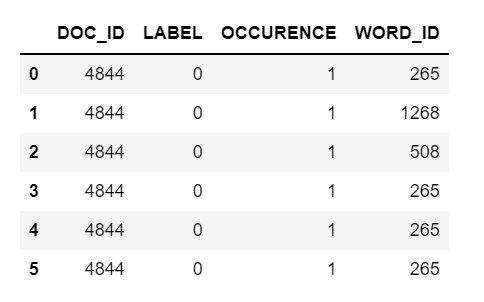

In [128]:
# we need to frame the dataset as shown above image so we need fun as shown below and rqd parameters like df, word_index and labels

In [129]:
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'fashion', 'invalid', 'raid', 'distributor', 'tobacco', 'till', 'corn',
       'analog', 'apach', 'overnight'],
      dtype='object', name='VOCAB_WORD', length=2500)

In [130]:
def make_sparse_matrix(df, indexed_words, labels):
    
    nr_rows = df.shape[0]
    
    nr_cols = df.shape[1]
    
    
    word_set = set(indexed_words)
    
    dict_list = []
    
    
    for i in range(nr_rows):
        
        for j in range(nr_cols):
            
            word = df.iat[i,j]
            
            if word in word_set:
                
                doc_id = df.index[i]
                
                word_id = indexed_words.get_loc(word)
                
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id, 'OCCURRENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)

In [131]:
X_train.index[0]

4844

In [132]:
y_train[4844]

0

In [133]:
word_index.get_loc('ye')

265

In [134]:
OCCURRENCE = 1

In [135]:
X_train.shape

(4057, 7671)

In [136]:
nr_rows = X_train.shape[0]
nr_rows

4057

In [137]:
nr_cols = X_train.shape[1]
nr_cols

7671

In [138]:
sparse_train_df=make_sparse_matrix(X_train, word_index, y_train) # sparse matrix mostly consist of 0's and 1's but in order to reduce memory size we focussed on 1's as result
sparse_train_df

,LABEL,DOC_ID,OCCURRENCE,WORD_ID
0,0,4844,1,265
1,0,4844,1,1239
2,0,4844,1,504
3,0,4844,1,308
4,0,4844,1,254
...,...,...,...,...
429179,1,860,1,47
429180,1,860,1,1431
429181,1,860,1,26
429182,1,860,1,21


In [139]:
train_grouped=sparse_train_df.groupby(['DOC_ID','WORD_ID','LABEL']).sum()
train_grouped

OCCURRENCE
DOC_ID WORD_ID LABEL            
0      2       1               1
       3       1               2
       4       1               1
       7       1               3
       11      1               1
...                          ...
5795   2032    0               2
       2037    0               1
       2271    0               1
       2348    0               1
       2379    0               1

[258332 rows x 1 columns]

In [140]:
train_grouped=train_grouped.reset_index()
train_grouped

,DOC_ID,WORD_ID,LABEL,OCCURRENCE
0,0,2,1,1
1,0,3,1,2
2,0,4,1,1
3,0,7,1,3
4,0,11,1,1
...,...,...,...,...
258327,5795,2032,0,2
258328,5795,2037,0,1
258329,5795,2271,0,1
258330,5795,2348,0,1


In [141]:
TRAINING_DATA_FILE = 'SpamData/SpamData/02_Training/train-data.txt'
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

In [142]:
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)
sparse_test_df

,LABEL,DOC_ID,OCCURRENCE,WORD_ID
0,0,4675,1,89
1,0,4675,1,299
2,0,4675,1,546
3,0,4675,1,84
4,0,4675,1,466
...,...,...,...,...
203399,0,4354,1,1
203400,0,4354,1,431
203401,0,4354,1,51
203402,0,4354,1,87


In [143]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped

,DOC_ID,WORD_ID,LABEL,OCCURRENCE
0,8,2,1,1
1,8,3,1,4
2,8,4,1,2
3,8,5,1,1
4,8,6,1,2
...,...,...,...,...
117769,5793,2345,0,2
117770,5793,2358,0,4
117771,5793,2369,0,1
117772,5793,2399,0,3


In [144]:
TEST_DATA_FILE = 'SpamData/SpamData/02_Training/test-data.txt'
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

In [145]:
len(X_test)

1739

In [146]:
len(X_train)

4057

In [147]:
len(test_grouped.DOC_ID.unique())

1724

In [148]:
no_of_test_mails_lost = len(X_test) - len(test_grouped.DOC_ID.unique())
no_of_test_mails_lost

15

In [149]:
no_of_train_mails_lost = len(X_train) - len(train_grouped.DOC_ID.unique())
no_of_train_mails_lost 

44

In [150]:
set(X_test.index) - set(test_grouped.DOC_ID.unique())

{134, 179, 240, 274, 298, 339, 439, 471, 670, 734, 765, 945, 1544, 1670, 1700}

In [151]:
data.MESSAGE[134]

'------=_NextPart_000_00E8_85C13B1D.B7243B86\n\nContent-Type: text/html; charset="iso-8859-1"\n\nContent-Transfer-Encoding: base64\n\n\n\n\n\nPGh0bWw+DQoNCjxib2R5IGJnY29sb3I9IiNGRkZGRkYiIHRleHQ9IiMwMDAw\n\nMDAiPiANCjxwIGFsaWduPSJjZW50ZXIiPjxhIGhyZWY9Imh0dHA6Ly93d3cu\n\nZGlyZWN0d2Vic3RvcmUuY29tL3RveXMvaW5kZXguaHRtbCI+PGltZyBzcmM9\n\nImh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL21waWMuanBnIiB3aWR0\n\naD0iNTAwIiBoZWlnaHQ9IjMzOSIgYm9yZGVyPSIwIj48L2E+PGJyPiANCjxm\n\nb250IHNpemU9IjMiIGZhY2U9IkFyaWFsLCBIZWx2ZXRpY2EsIHNhbnMtc2Vy\n\naWYiPjxhIGhyZWY9Imh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL3Rv\n\neXMvaW5kZXguaHRtbCI+PGI+RU5URVIgDQpOT1cgaWYgeW91IGFyZSAxOCBh\n\nbmQgb3ZlcjwvYj48L2E+PC9mb250PjwvcD4gDQo8cCBhbGlnbj0iY2VudGVy\n\nIj48Zm9udCBmYWNlPSJBcmlhbCwgSGVsdmV0aWNhLCBzYW5zLXNlcmlmIiBz\n\naXplPSI0IiBjb2xvcj0iI0ZGMDAwMCI+PGI+U1BFQ0lBTCANCk9GRkVSPGJy\n\nPiANCjxmb250IHNpemU9IjUiPjMwIERheXMgPGk+RlJFRSBhY2Nlc3M8L2k+\n\nIDwvZm9udD48YnI+IA0KdG8gdGhlIGxhcmdlc3QgQWR1bHRzaXRlIG9uIHRo\n\nZSB3ZWIuPGJyPiANCjwvYj4gPG

In [152]:
clean_msg_no_html(data.MESSAGE[134])

[]

In [153]:
data.loc[134]

MESSAGE      ------=_NextPart_000_00E8_85C13B1D.B7243B86\n\...
CATEGORY                                                     1
FILE_NAME               00135.00e388e3b23df6278a8845047ca25160
Name: 134, dtype: object

In [154]:
file_number_135 = 'SpamData/SpamData/01_Processing/spam_assassin_corpus/spam_1/00135.00e388e3b23df6278a8845047ca25160'

In [155]:
file_number_135_stream = open(file_number_135)
message_135 = file_number_135_stream.read()
file_number_135_stream.close()
print(message_135)

From new_adult_toys_0463b54@yahoo.com  Wed Aug 28 11:04:02 2002
Return-Path: <new_adult_toys_0463b54@yahoo.com>
Delivered-To: zzzz@localhost.spamassassin.taint.org
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 32C7943F99
	for <zzzz@localhost>; Wed, 28 Aug 2002 06:03:57 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Wed, 28 Aug 2002 11:03:57 +0100 (IST)
Received: from yahoo.com (IDENT:squid@[211.57.23.142]) by
    dogma.slashnull.org (8.11.6/8.11.6) with SMTP id g7RJLTZ22353 for
    <webmaster@efi.ie>; Tue, 27 Aug 2002 20:21:30 +0100
Received: from 144.60.76.182 ([144.60.76.182]) by smtp4.cyberecschange.com
    with SMTP; 28 Aug 0102 14:16:34 -0100
Received: from pet.vosni.net ([179.59.188.175]) by
    smtp-server.tampabayr.com with smtp; 28 Aug 0102 13:11:42 -0900
Received: from 179.125.241.6 ([179.125.241.6]) by smtp-server1.cflrr.com
    with a